Realmente esto no es un ia notebook, es el video de:  
Aprende a programar una red neuronal - Tensorflow, Keras, Sklearn  
Pero es algo así como otra alternativa a lo que hicimos en el ia notebook 4.0

# Tensorflow

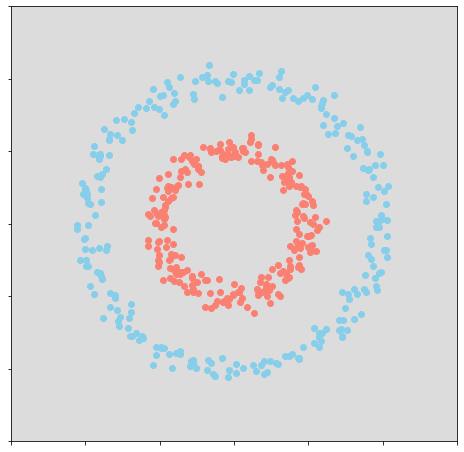

In [26]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar dos anillos
# concéntricos de datos.

X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolucion del mapa de prediccion
res = 100

# Coordenadas del mapa de prediccion
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas dle mapa de prediccion
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objetivo vacio a 0.5 del mapa de predicción
_pY = np.zeros((res, res)) + 0.5

# Visualizamos el mapa de prediccion
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualizamos la nube de datos
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")
plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

In [27]:
from matplotlib import animation
from IPython.core.display import display, HTML

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Creamos los puntos de entrada de datos de nuestro grafo, 
# hay que decirle a tensorflow el tipo de dato y tamaño del dato
# que va a recibir, así como la salida que esperamos y el tamaño de la misma
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

nn = [2, 16, 8, 1] # Número de neuronas por capa
lr = 0.05 # learning rate

In [28]:
# Capa 1
# Parametros optimizados en nuestra red, le decimos a tf que los valores,
# se inicializan aleatoriamente y le decimos las dimensiones de los mismos
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name="Weights_1") # nuestros pesos
b1 = tf.Variable(tf.random_normal([nn[1]]), name="bias_1") # nuestro bias

# operacion de la capa 1 consiste en multiplicar X y W y sumar el parametro de bias,
# y por ultimo pasar todo esto para la función relu
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name="Weights_2")
b2 = tf.Variable(tf.random_normal([nn[2]]), name="bias_2")
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3 y ultima
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name="Weights_3")
b3 = tf.Variable(tf.random_normal([nn[3]]), name="bias_3")

# vector de predicciones Y
# lo pasamos por sigmoid para acotar entre 0 y 1 el resultado final
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:,0]

In [29]:
# Evaluacion de las predicciones
loss = tf.losses.mean_squared_error(pY, iY)

# Creamos el optimizador que entrenará a la red (descenso del gradiente)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

In [31]:
# Ejecutemos las capas
n_steps = 1000 # Numero de pasos para entranar a la red
iPY = [] # guardaremos la evolucion de la prediccion para ver luego la animacion

with tf.Session() as sess:
  # Inicializa todos los parametros anteriores (las matrices de peso y bias W1, b1, W2, b2...)
  sess.run(tf.global_variables_initializer())

  for step in range(n_steps):
    # Esta linea evalua aquello que queremos ejecutar, le decimos a tf
    # los tensores optimizer, loss, pY con los datos de entrada en feed_dict
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={iX: X, iY : Y})
    
    if step % 25 == 0:
      # Calculo del accuracy entr ele vector real y las predicciones
      acc = np.mean(np.round(_pY) == Y)

      # print('Step', step, '/', n_steps, '- Loss =', _loss, '- Acc =', acc)

      # Obtenemos las predicciones para cada punto de nuestro mapa de predicción _pX
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

      # Y lo guardamos para visualizar la animación
      iPY.append(_pY)

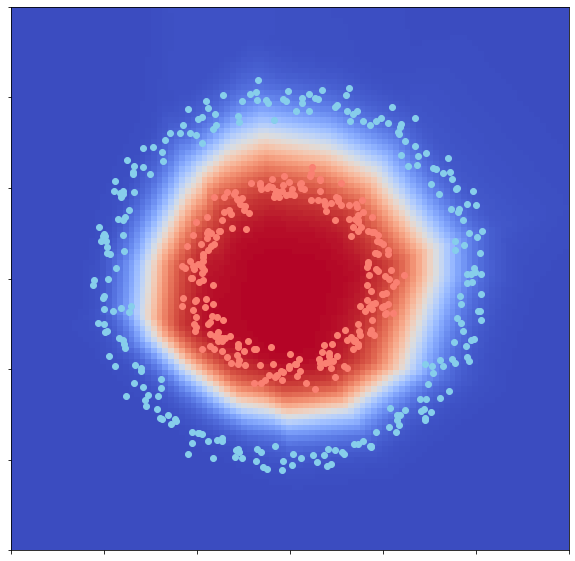

In [32]:
# Pasemos a animar en 2D el aprendizaje

ims = []

fig = plt.figure(figsize=(10, 10))

for fr in range(len(iPY)):
  
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualización de la nube de datos
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  # plt.title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)

  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_html5_video())

# Keras

In [ ]:
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa


# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas (de ahí squentials)
model = kr.Sequential()

# Hay varios tipos de capas, nosotros vamos a usar capas Densas o Dense
# que son capas llamadas "Fully Connected", hay que decirle el numero de neuronas
# que contiene y la función que va a ejecutar

# Añadimos la capa 1, 2 y 3
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador
model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=0.05), metrics=['acc'])

# Y entrenamos al modelo
resultado = model.fit(X, Y, epochs=100)

# Sklearn

La pega de abstraer tanto (hemos pasado de tensorflow a keras y de keras a sklearn) es que aunque el codigo es mas pequeño tenemos menos flexibilidad.

En el caso de sklearn, la red neuronal pasa a ser un modelo, y tienes que adaptarte a dicho modelo. Hay varios entre los que elegir pero ya no tienes 
toda la flexibilidad que tenias antes. Ahora solo puedes cambiar algunos parametros.

In [ ]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa

# Creamos el objeto del modelo de red neuronal multicapa
model = sk.neural_network.MLPRegressor(
    solver='sgd', 
    learning_rate_init=lr, 
    hidden_layer_sizes=tuple(nn[1:]), 
    verbose=True, 
    n_iter_no_change=1000)


# Y lo entrenamos con nuestro datos.
model.fit(X, Y)